In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

figsize = (7,5)
accuracyYScale = (0.5, 1)
fileFormat = ".pdf"

time: [56.62208699999999, 83.37441533333333, 114.41895433333333, 233.74127099999998, 387.61479033333336] [0.7540516117019674, 3.627029361901755, 0.14988953249458142, 1.3448553670571142, 27.60352692659245]
accuracy: [0.8759460446666667, 0.9448852536666666, 0.9566040039999999, 0.9670511880000001, 0.9661661783333333] [0.009180940007533037, 0.0015707908976090527, 0.0012453763269447136, 0.0002615349223513838, 0.00041295926815780717]


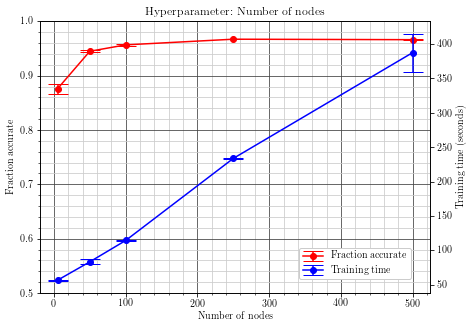

In [15]:


filename = "nNodesTests"

time,trainingAccuracy,evaluatedAccuracy,nodes=np.loadtxt('metrics/'+filename+'.csv', delimiter=',', skiprows=1, usecols=(5,6,7,8), unpack=True)
# print(time,trainingAccuracy,evaluatedAccuracy,nodes)

# meanTime = []
# meanTrainingAccuracy = []
# meanEvaluatedAccuracy = []
# meanTimeError = []
# meanTrainingAccuracyError = []
# meanEvaluatedAccuracyError = []

# nNodes = [5,50,100,250,500]
# N = 3#number of measurements for each N (how many rows have n nodes)
# for n in nNodes:
#     timeSum = 0
#     trainingAccuracySum = 0
#     evaluatedAccuracySum = 0
#     timeDevSquareSum = 0
#     trainingAccuracyDevSquareSum = 0
#     evaluatedAccuracyDevSquareSum = 0

#     #calculate means
#     for i in range(len(nodes)):
#         if int(nodes[i]) == n:
#             timeSum += time[i]
#             trainingAccuracySum += trainingAccuracy[i]
#             evaluatedAccuracySum += evaluatedAccuracy[i]

#     meanTimen = timeSum / N
#     meanTrainingAccuracyn = trainingAccuracySum / N
#     meanEvaluatedAccuracyn = evaluatedAccuracySum / N
#     meanTime.append(meanTimen)
#     meanTrainingAccuracy.append(meanTrainingAccuracyn)
#     meanEvaluatedAccuracy.append(meanEvaluatedAccuracyn)

#     #calculate errors on means
#     for i in range(len(nodes)):
#         if int(nodes[i]) == n:
#             timeDevSquareSum += (time[i]-meanTimen)**2
#             trainingAccuracyDevSquareSum += (trainingAccuracy[i]-meanTrainingAccuracyn)**2
#             evaluatedAccuracyDevSquareSum += (evaluatedAccuracy[i]-meanEvaluatedAccuracyn)**2

#     meanTimeError.append(np.sqrt(timeDevSquareSum / N))
#     meanTrainingAccuracyError.append(np.sqrt(trainingAccuracyDevSquareSum / N))
#     meanEvaluatedAccuracyError.append(np.sqrt(evaluatedAccuracyDevSquareSum / N))

# print(meanTime, meanTimeError)
# print(meanAccuracy,meanAccuracyError)


############################

from scipy.stats import sem
meanEvalAccuracy = []
meanEvalAccuracyError = []
meanTime = []
meanTimeError = []

nNodes = [5,50,100,250,500]
N = 3#number of measurements for each N (how many rows have n layers)
for n in nNodes:
    evalAccuracyRepeats = []
    timeRepeats = []

    for i in range(len(nodes)):
        if int(nodes[i]) == n:
            evalAccuracyRepeats.append(evaluatedAccuracy[i])
            timeRepeats.append(time[i])

    meanEvalAccuracy.append(np.sum(evalAccuracyRepeats) / N)
    meanEvalAccuracyError.append(sem(evalAccuracyRepeats))

    meanTime.append(np.sum(timeRepeats) / N)
    meanTimeError.append(sem(timeRepeats))




print("time:",meanTime, meanTimeError)
print("accuracy:",meanEvalAccuracy,meanEvalAccuracyError)












fig, ax = plt.subplots(figsize=figsize)
ax.set_title("Hyperparameter: Number of nodes")
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Fraction accurate")
ax.set_ylim(accuracyYScale)
ax.grid(which="major", c="#444")
ax.grid(which="minor", c="#ccc")
plt.minorticks_on()
ax.errorbar(nNodes, meanEvalAccuracy, yerr=meanEvalAccuracyError, c='r', label='Fraction accurate', marker="o", capsize=10)
ax2=ax.twinx()
#ax2.errorbar(nNodes, meanTrainingAccuracy, yerr=meanTrainingAccuracyError, c='gray', label='Final training accuracy', marker="o", capsize=10)
ax2.errorbar(nNodes,meanTime, yerr=meanTimeError, c='b', label="Training time", marker="o", capsize=10)

ax2.set_ylabel("Training time (seconds)")
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.75,0.15))
plt.savefig("metricsPlots/"+filename+fileFormat, bbox_inches='tight')


time: [53.99437233333333, 59.930194, 68.66467733333333, 74.40491233333334, 56.07259366666667] [0.8169234165039242, 0.10934775703842012, 1.0861556319199586, 2.2296622450803576, 4.168483582734867]
accuracy: [0.8675740556666667, 0.962504069, 0.8966979983333333, 0.9181518556666667, 0.9045104979999999] [0.0054913082015891615, 0.0025606491741892875, 0.032191652508540884, 0.04754650435920273, 0.05769348763020766]


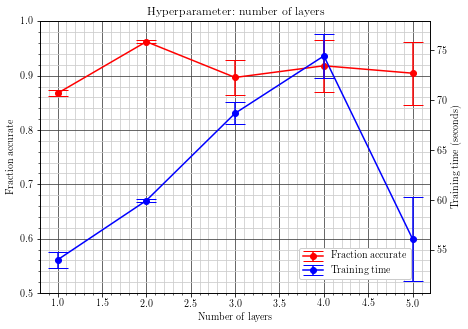

In [16]:
filename = "nLayersTests"

time,trainingAccuracy,evaluatedAccuracy,layers=np.loadtxt('metrics/'+filename+'.csv', delimiter=',', skiprows=1, usecols=(5,6,7,9), unpack=True)
# print(time,trainingAccuracy,evaluatedAccuracy,layers)

# meanTime = []
# meanTrainingAccuracy = []
# meanEvaluatedAccuracy = []
# meanTimeError = []
# meanTrainingAccuracyError = []
# meanEvaluatedAccuracyError = []

# nLayers = [1,2,3,4,5]
# N = 3#number of measurements for each N (how many rows have n layers)
# for n in nLayers:
#     timeSum = 0
#     trainingAccuracySum = 0
#     evaluatedAccuracySum = 0
#     timeDevSquareSum = 0
#     trainingAccuracyDevSquareSum = 0
#     evaluatedAccuracyDevSquareSum = 0

#     #calculate means
#     for i in range(len(layers)):
#         if int(layers[i]) == n:
#             timeSum += time[i]
#             trainingAccuracySum += trainingAccuracy[i]
#             evaluatedAccuracySum += evaluatedAccuracy[i]

#     meanTimen = timeSum / N
#     meanTrainingAccuracyn = trainingAccuracySum / N
#     meanEvaluatedAccuracyn = evaluatedAccuracySum / N
#     meanTime.append(meanTimen)
#     meanTrainingAccuracy.append(meanTrainingAccuracyn)
#     meanEvaluatedAccuracy.append(meanEvaluatedAccuracyn)

#     #calculate errors on means
#     for i in range(len(layers)):
#         if int(layers[i]) == n:
#             timeDevSquareSum += (time[i]-meanTimen)**2
#             trainingAccuracyDevSquareSum += (trainingAccuracy[i]-meanTrainingAccuracyn)**2
#             evaluatedAccuracyDevSquareSum += (evaluatedAccuracy[i]-meanEvaluatedAccuracyn)**2

#     meanTimeError.append(np.sqrt(timeDevSquareSum / N))
#     meanTrainingAccuracyError.append(np.sqrt(trainingAccuracyDevSquareSum / N))
#     meanEvaluatedAccuracyError.append(np.sqrt(evaluatedAccuracyDevSquareSum / N))

# print("old time:",meanTime, meanTimeError)
# print("old accuracy:",meanEvaluatedAccuracy,meanEvaluatedAccuracyError)

############################

from scipy.stats import sem
meanEvalAccuracy = []
meanEvalAccuracyError = []
meanTime = []
meanTimeError = []

nLayers = [1,2,3,4,5]
N = 3#number of measurements for each N (how many rows have n layers)
for n in nLayers:
    evalAccuracyRepeats = []
    timeRepeats = []

    for i in range(len(layers)):
        if int(layers[i]) == n:
            evalAccuracyRepeats.append(evaluatedAccuracy[i])
            timeRepeats.append(time[i])

    meanEvalAccuracy.append(np.sum(evalAccuracyRepeats) / N)
    meanEvalAccuracyError.append(sem(evalAccuracyRepeats))

    meanTime.append(np.sum(timeRepeats) / N)
    meanTimeError.append(sem(timeRepeats))




print("time:",meanTime, meanTimeError)
print("accuracy:",meanEvalAccuracy,meanEvalAccuracyError)

fig, ax = plt.subplots(figsize=figsize)
ax.set_title("Hyperparameter: number of layers")
ax.set_xlabel("Number of layers")
ax.set_ylabel("Fraction accurate")
ax.set_ylim(accuracyYScale)
ax.grid(which="major", c="#444")
ax.grid(which="minor", c="#ccc")
plt.minorticks_on()
ax.errorbar(nLayers, meanEvalAccuracy, yerr=meanEvalAccuracyError, c='r', label='Fraction accurate', marker="o", capsize=10)
ax2=ax.twinx()
#ax2.errorbar(nLayers, meanTrainingAccuracy, yerr=meanTrainingAccuracyError, c='gray', label='Final training accuracy', marker="o", capsize=10)
ax2.errorbar(nLayers,meanTime, yerr=meanTimeError, c='b', label="Training time", marker="o", capsize=10)

ax2.set_ylabel("Training time (seconds)")
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.75,0.15))
plt.savefig("metricsPlots/"+filename+fileFormat, bbox_inches='tight')


C:\Users\Daniel\AppData\Local\Temp/ipykernel_9120/1847746611.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  time,trainingAccuracy,evaluatedAccuracy, activationFunction=np.genfromtxt('metrics/'+filename+'.csv', delimiter=',', skip_header=1, usecols=(5,6,7,10), unpack=True,dtype=None)


time: [56.24059199999999, 56.10438333333334, 56.388397] [0.3718428942698787, 0.17115045528650585, 0.3888419629605311]
accuracy: [0.8650105793333333, 0.601857503, 0.7356872556666666] [0.005045542160099249, 0.017484569048181513, 0.01597376846766146]


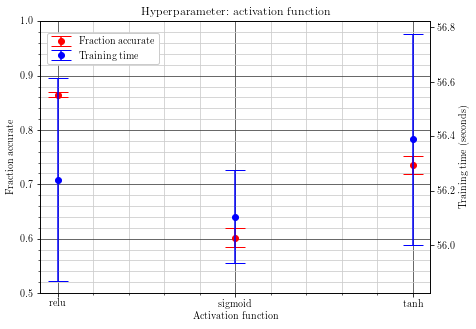

In [17]:
filename = "activationFunctionTests"

time,trainingAccuracy,evaluatedAccuracy, activationFunction=np.genfromtxt('metrics/'+filename+'.csv', delimiter=',', skip_header=1, usecols=(5,6,7,10), unpack=True,dtype=None)
activationFunction=activationFunction.astype("str")
# print(time,trainingAccuracy,evaluatedAccuracy, activationFunction)

# meanTime = []
# meanTrainingAccuracy = []
# meanEvaluatedAccuracy = []
# meanTimeError = []
# meanTrainingAccuracyError = []
# meanEvaluatedAccuracyError = []

# activationFunctions = ["relu", "sigmoid", "tanh"]
# N = 3#number of measurements for each activ. func.
# for a in activationFunctions:
#     timeSum = 0
#     trainingAccuracySum = 0
#     evaluatedAccuracySum = 0
#     timeDevSquareSum = 0
#     trainingAccuracyDevSquareSum = 0
#     evaluatedAccuracyDevSquareSum = 0

#     #calculate means
#     for i in range(len(activationFunction)):
#         if activationFunction[i] == a:
#             timeSum += time[i]
#             trainingAccuracySum += trainingAccuracy[i]
#             evaluatedAccuracySum += evaluatedAccuracy[i]

#     meanTimen = timeSum / N
#     meanTrainingAccuracyn = trainingAccuracySum / N
#     meanEvaluatedAccuracyn = evaluatedAccuracySum / N
#     meanTime.append(meanTimen)
#     meanTrainingAccuracy.append(meanTrainingAccuracyn)
#     meanEvaluatedAccuracy.append(meanEvaluatedAccuracyn)

#     #calculate errors on means
#     for i in range(len(activationFunction)):
#         if activationFunction[i] == a:
#             timeDevSquareSum += (time[i]-meanTimen)**2
#             trainingAccuracyDevSquareSum += (trainingAccuracy[i]-meanTrainingAccuracyn)**2
#             evaluatedAccuracyDevSquareSum += (evaluatedAccuracy[i]-meanEvaluatedAccuracyn)**2

#     meanTimeError.append(np.sqrt(timeDevSquareSum / N))
#     meanTrainingAccuracyError.append(np.sqrt(trainingAccuracyDevSquareSum / N))
#     meanEvaluatedAccuracyError.append(np.sqrt(evaluatedAccuracyDevSquareSum / N))

############################

from scipy.stats import sem
meanEvalAccuracy = []
meanEvalAccuracyError = []
meanTime = []
meanTimeError = []

activationFunctions = ["relu", "sigmoid", "tanh"]
N = 3#number of measurements for each N (how many rows have n layers)
for n in activationFunctions:
    evalAccuracyRepeats = []
    timeRepeats = []

    for i in range(len(activationFunction)):
        if str(activationFunction[i]) == n:
            evalAccuracyRepeats.append(evaluatedAccuracy[i])
            timeRepeats.append(time[i])

    meanEvalAccuracy.append(np.sum(evalAccuracyRepeats) / N)
    meanEvalAccuracyError.append(sem(evalAccuracyRepeats))

    meanTime.append(np.sum(timeRepeats) / N)
    meanTimeError.append(sem(timeRepeats))




print("time:",meanTime, meanTimeError)
print("accuracy:",meanEvalAccuracy,meanEvalAccuracyError)

fig, ax = plt.subplots(figsize=figsize)
ax.set_title("Hyperparameter: activation function")
ax.set_xlabel("Activation function")
ax.set_ylabel("Fraction accurate")
ax.set_ylim(accuracyYScale)
ax.grid(which="major", c="#444")
ax.grid(which="minor", c="#ccc")
plt.minorticks_on()
ax.errorbar(activationFunctions, meanEvalAccuracy, yerr=meanEvalAccuracyError, c='r', label='Fraction accurate', fmt="o", capsize=10)
ax2=ax.twinx()
#ax2.errorbar(activationFunctions, meanTrainingAccuracy, yerr=meanTrainingAccuracyError, c='gray', label='Final training accuracy', fmt="o", capsize=10)
ax2.errorbar(activationFunctions,meanTime, yerr=meanTimeError, c='b', label="Training time", fmt='o', capsize=10)

ax2.set_ylabel("Training time (seconds)")
fig.legend(loc="upper center", framealpha=1, bbox_to_anchor=(0.25,0.86))
plt.savefig("metricsPlots/"+filename+fileFormat, bbox_inches='tight')

time: [54.48262666666667, 19.95165, 11.068035333333333, 7.865716666666667, 9.281065333333334, 9.355167, 10.594895666666666, 15.184767333333333] [0.29363112714557077, 1.265486268602047, 0.2445355917082646, 0.11884179601797425, 0.27341435085618854, 0.19547725526004284, 0.5661899734030184, 1.7666767893304023]
accuracy: [0.866414388, 0.6715799969999999, 0.6476949053333333, 0.588429769, 0.6243184406666668, 0.5893961586666666, 0.5809631346666667, 0.5437316893333333] [0.0026941068255807847, 0.006325471075962405, 0.02582270646780231, 0.048869104396561565, 0.002750497441124042, 0.007268915948607111, 0.01318497121097127, 0.013721138849431748]


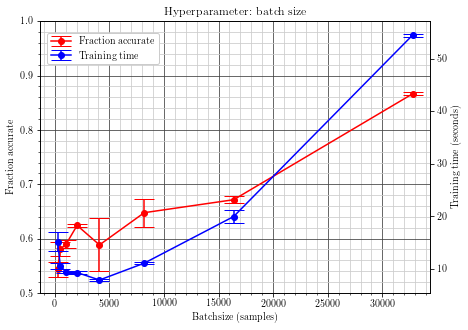

In [18]:
filename = "batchsizeTests"

time,trainingAccuracy,evaluatedAccuracy,batchsize=np.loadtxt('metrics/'+filename+'.csv', delimiter=',', skiprows=1, usecols=(5,6,7,2), unpack=True)
# print(time,trainingAccuracy,evaluatedAccuracy,batchsize)

# meanTime = []
# meanTrainingAccuracy = []
# meanEvaluatedAccuracy = []
# meanTimeError = []
# meanTrainingAccuracyError = []
# meanEvaluatedAccuracyError = []

# batchsizes = [32768,16384,8192,4096, 2048, 1024, 512, 256]
# N = 3#number of measurements for each batchsize
# for n in batchsizes:
#     timeSum = 0
#     trainingAccuracySum = 0
#     evaluatedAccuracySum = 0
#     timeDevSquareSum = 0
#     trainingAccuracyDevSquareSum = 0
#     evaluatedAccuracyDevSquareSum = 0

#     #calculate means
#     for i in range(len(batchsize)):
#         if int(batchsize[i]) == n:
#             timeSum += time[i]
#             trainingAccuracySum += trainingAccuracy[i]
#             evaluatedAccuracySum += evaluatedAccuracy[i]

#     meanTimen = timeSum / N
#     meanTrainingAccuracyn = trainingAccuracySum / N
#     meanEvaluatedAccuracyn = evaluatedAccuracySum / N
#     meanTime.append(meanTimen)
#     meanTrainingAccuracy.append(meanTrainingAccuracyn)
#     meanEvaluatedAccuracy.append(meanEvaluatedAccuracyn)

#     #calculate errors on means
#     for i in range(len(batchsize)):
#         if int(batchsize[i]) == n:
#             timeDevSquareSum += (time[i]-meanTimen)**2
#             trainingAccuracyDevSquareSum += (trainingAccuracy[i]-meanTrainingAccuracyn)**2
#             evaluatedAccuracyDevSquareSum += (evaluatedAccuracy[i]-meanEvaluatedAccuracyn)**2

#     meanTimeError.append(np.sqrt(timeDevSquareSum / N))
#     meanTrainingAccuracyError.append(np.sqrt(trainingAccuracyDevSquareSum / N))
#     meanEvaluatedAccuracyError.append(np.sqrt(evaluatedAccuracyDevSquareSum / N))

############################

from scipy.stats import sem
meanEvalAccuracy = []
meanEvalAccuracyError = []
meanTime = []
meanTimeError = []

batchsizes = [32768,16384,8192,4096, 2048, 1024, 512, 256]
N = 3#number of measurements for each N (how many rows have n layers)
for n in batchsizes:
    evalAccuracyRepeats = []
    timeRepeats = []

    for i in range(len(batchsize)):
        if int(batchsize[i]) == n:
            evalAccuracyRepeats.append(evaluatedAccuracy[i])
            timeRepeats.append(time[i])

    meanEvalAccuracy.append(np.sum(evalAccuracyRepeats) / N)
    meanEvalAccuracyError.append(sem(evalAccuracyRepeats))

    meanTime.append(np.sum(timeRepeats) / N)
    meanTimeError.append(sem(timeRepeats))




print("time:",meanTime, meanTimeError)
print("accuracy:",meanEvalAccuracy,meanEvalAccuracyError)

fig, ax = plt.subplots(figsize=figsize)
ax.set_title("Hyperparameter: batch size")
ax.set_xlabel("Batchsize (samples)")
ax.set_ylabel("Fraction accurate")
ax.set_ylim(accuracyYScale)
ax.grid(which="major", c="#444")
ax.grid(which="minor", c="#ccc")
plt.minorticks_on()
ax.errorbar(batchsizes, meanEvalAccuracy, yerr=meanEvalAccuracyError, c='r', label='Fraction accurate', marker="o", capsize=10)
ax2=ax.twinx()
#ax2.errorbar(batchsizes, meanTrainingAccuracy, yerr=meanTrainingAccuracyError, c='gray', label='Final training accuracy', marker="o", capsize=10)
ax2.errorbar(batchsizes,meanTime, yerr=meanTimeError, c='b', label="Training time", marker="o", capsize=10)

ax2.set_ylabel("Training time (seconds)")
fig.legend(loc="upper center", framealpha=1, bbox_to_anchor=(0.25,0.86))
plt.savefig("metricsPlots/"+filename+fileFormat, bbox_inches='tight')

In [12]:
# filename = "activationFunctionTests"

# trainingAccuracy, evaluatedAccuracy=np.loadtxt('metrics/'+filename+'.csv', delimiter=',', skiprows=1, usecols=(6,7), unpack=True)
# print(trainingAccuracy, evaluatedAccuracy)


# fig, ax = plt.subplots(figsize=figsize)
# ax.set_title("Final training accuracy vs evaluated accuracy")
# ax.set_xlabel("Final training accuracy")
# ax.set_ylabel("Evaluated accuracy")
# ax.scatter(trainingAccuracy, evaluatedAccuracy)
# # ax.errorbar(batchsizes,meanTime, yerr=meanTimeError, c='b', label="Training time", marker="o", capsize=10)
# # ax2=ax.twinx()
# # ax2.errorbar(batchsizes, meanAccuracy, yerr=meanAccuracyError, c='r', label='Final accuracy', marker="o", capsize=10)
# # ax2.set_ylabel("Accuracy")
# # #fig.legend()
# plt.savefig("metricsPlots/overtraining.svg", bbox_inches='tight')